## IMPORTING LIBRARIES

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### LOADING THE DATASETS

In [46]:
dataframe = pd.read_csv('googleplaystore.csv')

print('DATA SIZE :', dataframe.shape)
dataframe.head()

DATA SIZE : (10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### CHECKING FOR NULL VALUES

#### NUMBER OF NULL VALUES IN EACH COLUMN

In [47]:
dataframe.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### DROPPING NULL VALUES

In [48]:
dataframe.dropna(inplace = True)

dataframe.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### FIXING INCORRECT TYPE AND INCONSISTENT FORMATTING

In [49]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x) * 1000
        return x
    
    elif 'k' in size:
        x = size[:-1]
        x = float(x)
        return x
        
    else :
        return None

In [50]:
# APPLYING THE FUNCTION
dataframe['Size'] = dataframe['Size'].apply(change_size)


# FILLING THE NULL VALUES
dataframe['Size'].fillna(method='ffill',inplace=True)


dataframe['Size']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839     3600.0
10840    19000.0
Name: Size, Length: 9360, dtype: float64

### CONVERTING REVIEWS COLUMN TO INTEGER TYPE

In [51]:
dataframe['Reviews'] = dataframe['Reviews'].astype('int')

dataframe['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9360, dtype: int32

### CORRECTING THE INSTALL FIELD

In [52]:
# REPLACING THE SYMBOLS
dataframe['Installs'] = dataframe['Installs'].str.replace('+','')

dataframe['Installs'] = dataframe['Installs'].str.replace(',','')


# CHANGING THE DATA TYPE TO INTEGER
dataframe['Installs'] = dataframe['Installs'].astype('int')

dataframe['Installs']

C:\Users\sanch\AppData\Local\Temp\ipykernel_8048\3456700770.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataframe['Installs'] = dataframe['Installs'].str.replace('+','')


0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: int32

### CORRECTING THE PRICE FIELD

In [53]:
# REPLACING THE SYMBOL
dataframe['Price'] = dataframe['Price'].str.replace('$','')

# CONVERTING THE DATA TYPE TO NUMERIC
dataframe['Price'] = dataframe['Price'].apply(pd.to_numeric)


dataframe['Price']

C:\Users\sanch\AppData\Local\Temp\ipykernel_8048\1334504294.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataframe['Price'] = dataframe['Price'].str.replace('$','')


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9360, dtype: float64

### SANITY CHECKS

In [54]:
# CHECKING IF RATING > 5 OR < 1

for rating in dataframe['Rating']:
    if rating > 5 or rating < 1:
        pass
else:
    print('NO RATING ABOVE 5 OR BELOW 1')


NO RATING ABOVE 5 OR BELOW 1


In [55]:
# CHECKING IF REVIEWS > INSTALLS OR NOT
dataframe[dataframe['Reviews'] > dataframe['Installs']]
    

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,30000.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [56]:
# DROPPING INDEXES WHERE REVIEWS > INSTALLS

dataframe[dataframe['Reviews'] > dataframe['Installs']].index

dataframe.drop(dataframe[dataframe['Reviews'] > dataframe['Installs']].index, inplace = True)

In [57]:
# CHECKING PRICE FOR FREE APPS

dataframe[(dataframe['Type'] == 'FREE') & (dataframe['Price'] > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## UNIVARIATE ANALYSIS

C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


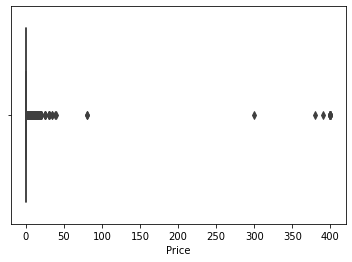

AVERAGE PRICE VALUE : 0.9614669090131509


In [58]:
sns.boxplot(dataframe['Price'])
plt.show()


print('AVERAGE PRICE VALUE :', dataframe['Price'].mean())

PRICE FIELD HAS MANY OUTLIERS SINCE THE AVERAGE PRICE OF APPS IS BELOW $1

C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


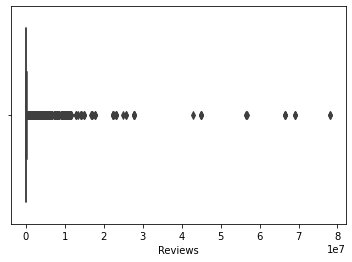

AVERAGE REVIEWS : 514760.5758580135


In [59]:
sns.boxplot(dataframe['Reviews'])
plt.show()

print('AVERAGE REVIEWS :', dataframe['Reviews'].mean())

REVIEWS FIELD ALSO HAS SOME OUTLIERS WITH VERY HIGH NUMBER COUNT

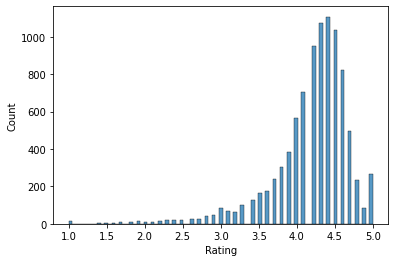

In [60]:
sns.histplot(dataframe['Rating'])
plt.show()

RATINGS ARE DISTRIBUTED MORE TOWARDS THE HIGHER SIDE

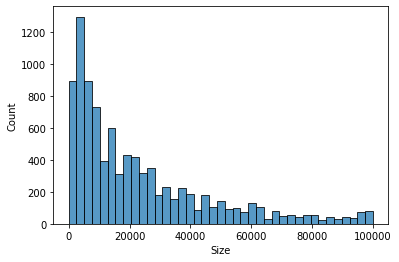

In [61]:
sns.histplot(dataframe['Size'])
plt.show()

### OUTLIER TREATMENT

#### PRICE FIELD

In [62]:
# APPS WITH PRICE MORE THAN $200

dataframe[dataframe['Price'] > 200].size

195

In [63]:
# DROPPING DATA POINTS WITH SUCH HIGH PRICES

print('SHAPE OF DATA SET BEFORE DROPPING :', dataframe.shape)

dataframe.drop(dataframe[dataframe['Price'] > 200].index, inplace = True)

print('SHAPE OF DATA SET AFTER DROPPING :', dataframe.shape)

SHAPE OF DATA SET BEFORE DROPPING : (9353, 13)
SHAPE OF DATA SET AFTER DROPPING : (9338, 13)


#### REVIEWS FIELD

In [64]:
# APPS WITH REVIEWS > 2MILLION

dataframe[dataframe['Reviews'] > 2000000].size

5889

In [65]:
# DROPPPING DATA POINTS WITH SUCH LARGE REVIEWS

dataframe.drop(dataframe[dataframe['Reviews'] > 2000000].index, inplace = True)

print('SHAPE OF DATA SET AFTER DROPPING :', dataframe.shape)

SHAPE OF DATA SET AFTER DROPPING : (8885, 13)


#### INSTALLS FIELD

In [66]:
# DIFFERENT QUANTILE RANGES

dataframe['Installs'].quantile([.10, .25, .50, .70, .90, .95, .99]) 

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [67]:
# VALUES HAVING INSTALLS >= 100 MILLION

dataframe[dataframe['Installs'] >= 100000000.0].size

1846

In [68]:
dataframe.drop(dataframe[dataframe['Installs'] >= 100000000.0].index, inplace = True)

print('SHAPE OF DATA SET AFTER DROPPING: ', dataframe.shape)

SHAPE OF DATA SET AFTER DROPPING:  (8743, 13)


### BIVARIATE ANALYSIS

#### RATING VS PRICE

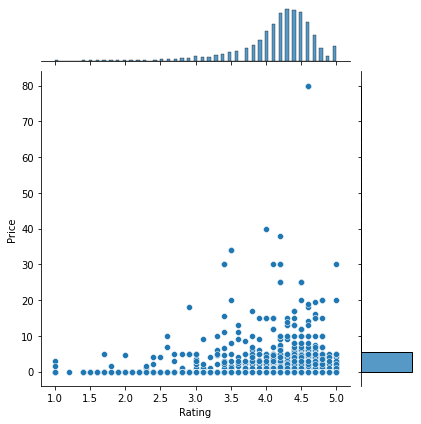

In [69]:
sns.jointplot(x='Rating', y='Price', data=dataframe)
plt.show()


RATINGS INCREASE WITH PRICE 

#### RATING VS SIZE

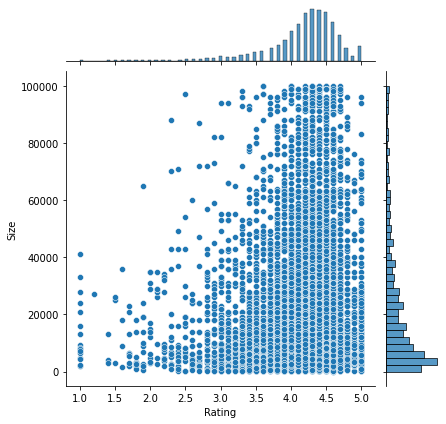

In [70]:
sns.jointplot(x='Rating',y='Size',data=dataframe)
plt.show()



HEAVIER APPS ARE RATED BETTER

#### RATING VS REVIEWS

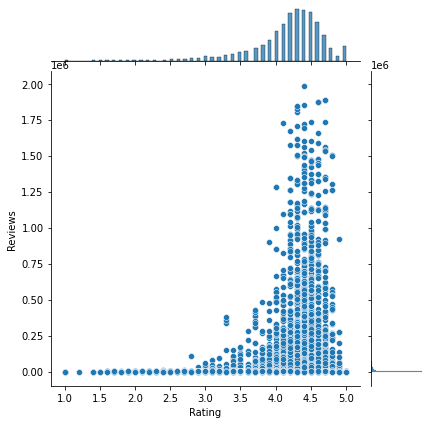

In [71]:
sns.jointplot(x = 'Rating', y = 'Reviews', data = dataframe)
plt.show()

APPS WITH MORE REVIEWS HAVE BETTER RATING AS WELL

#### RATING VS CONTENT

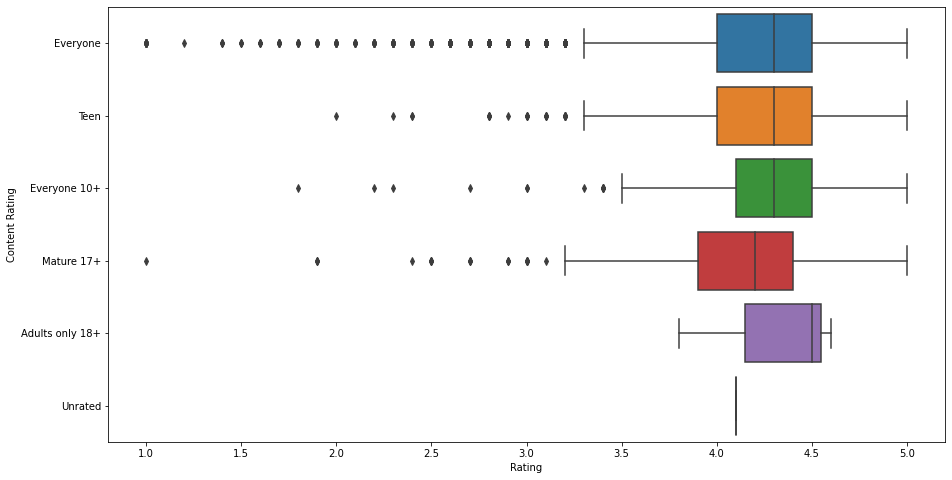

In [72]:
plt.figure(figsize = (15,8))
sns.boxplot(x ='Rating', y = 'Content Rating', data=dataframe)
plt.show()


EVERYONE AND TEEN SEEMS TO HAVE MORE HIGHER RATING THAN OTHERS

#### RATING VS CATEGORY

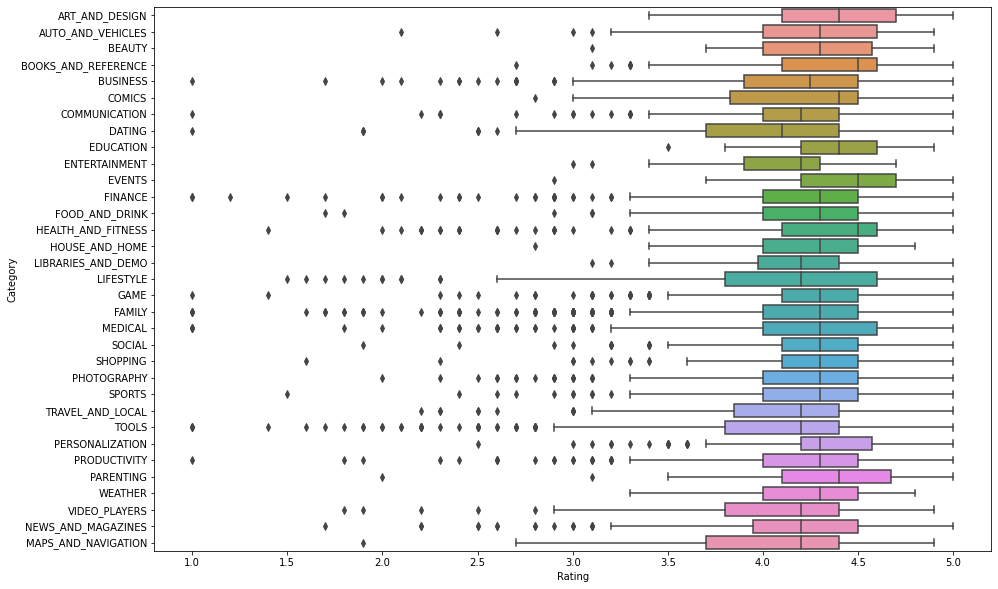

In [73]:
plt.figure(figsize = (15,10))
sns.boxplot(x ='Rating', y = 'Category', data=dataframe)
plt.show()



ART AND DESIGN AND PARENTING CATEGORIES SEEMS TO HAVE THE BEST RATINGS

### DATA PREPROCESSING

In [74]:
# CREATING COPY OF THE DATA

inp1 = dataframe.copy()
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,3600.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [75]:
inp1['Installs'] = inp1['Installs'].apply(np.log1p)
inp1['Reviews'] = inp1['Reviews'].apply(np.log1p)

In [78]:
inp1.drop(['App','Last Updated', 'Current Ver','Android Ver'], axis=1, inplace=True)

inp1.shape

(8743, 9)

#### CREATING DUMMY VALUES FOR CATEGORICAL FEATURES

In [102]:
inp2 = pd.get_dummies(inp1)

## MODEL BUILDING

In [103]:
### CREATING TARGET AND INPUT FEATURES

y = inp2.pop('Rating')
x = inp2

#### IMPORTING TRAIN_TEST_SPLIT

In [106]:
from sklearn.model_selection import train_test_split


In [132]:
# CREATING X_train, y_train, X_test, and y_test DATASETS

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)


print('X_train shape :', X_train.shape)

print('X_test shape :', X_test.shape)

print('y_train shape :', y_train.shape)

print('y_test shape :', y_test.shape)

X_train shape : (6120, 160)
X_test shape : (2623, 160)
y_train shape : (6120,)
y_test shape : (2623,)


#### IMPORTING LINEAR REGRESSION FROM SKLEARN LIBRARY

In [134]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [154]:
# APPLYING LINEAR REGRESSION ON THE TEST DATA

y_pred = linear_reg.predict(X_test)
y_pred

array([4.04742694, 3.9705283 , 4.20214468, ..., 4.30969141, 4.29988316,
       4.09565392])

#### IMPORTING MSE AND R2 SCORE FROM SKLEARN.METRICS

In [151]:
from sklearn.metrics import mean_squared_error

print("ROOT MEAN SQUARED ERROR OF THE DATA :", np.sqrt(mean_squared_error(y_test, y_pred)))

print()

from sklearn.metrics import r2_score

print("R2 SCORE OF THE MODEL :", r2_score(y_test, y_pred))

ROOT MEAN SQUARED ERROR OF THE DATA : 0.47855238766366565

R2 SCORE OF THE MODEL : 0.15335889694601212


In [153]:
# SAVING THE MODEL

import joblib
joblib.dump(linear_reg, 'Linear_regression_model.sav')

['Linear_regression_model.sav']